# DOMAIN ANALYSIS

### INPUT VARIABLES

#### ATTRIBUTES INFORMATION:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

### social and economic 

16 - emp.var.rate: employment varia15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success
context attributes
tion rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


In [79]:
# importing libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
# data reading
data = pd.read_csv("Portughese bank.csv",sep =';')

In [81]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [82]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [83]:
# replacing the catogerical data of y to numerical
data['y']=data['y'].replace({'yes':1,'no':0})
data['y']=data['y'].astype("int64")
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


#### BASIC CHECKS

In [84]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [85]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,0


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Data has no null values

In [72]:
data.shape

(41188, 21)

In [73]:
# describing the numerical datas
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [74]:
# describing the catogerical datas
data.describe (include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


In [75]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

# EXPLORATORY DATA ANALYSIS

In [76]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


### Univariate analysis 

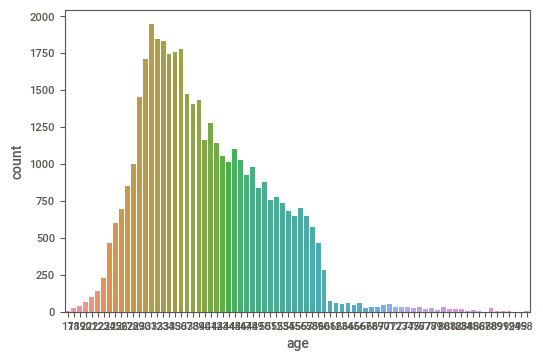

In [77]:
# univariate analysis using count plots
sns.countplot(x=data["age"],data=data)
plt.show()

In [78]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

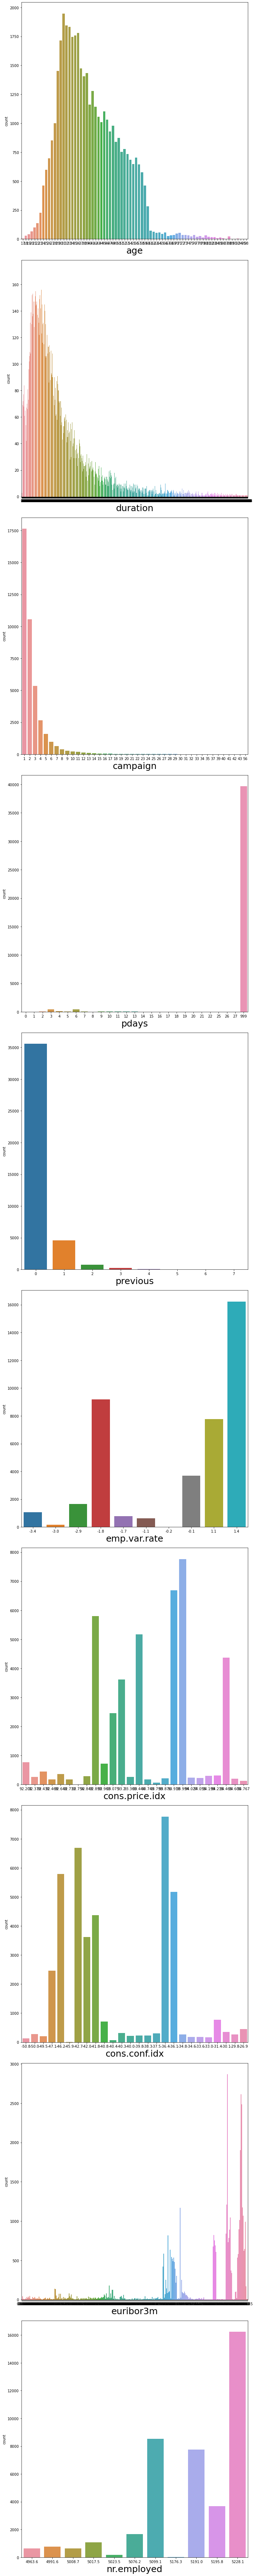

In [37]:
# ANALYSING ALL NUMERICAL DATA SETS USING COUNTPLOT
import warnings
warnings.filterwarnings('ignore')
data1=data[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','y']]
plt.figure(figsize=(10,100),facecolor="white")
plotnumber=1
for column in data1:
    
    if plotnumber<=10:
        
        ax=plt.subplot(10,1,plotnumber)
        sns.countplot(data1[column])
        plt.xlabel(column,fontsize=25)
        
        
    plotnumber+=1
plt.tight_layout()
plt.show()
    

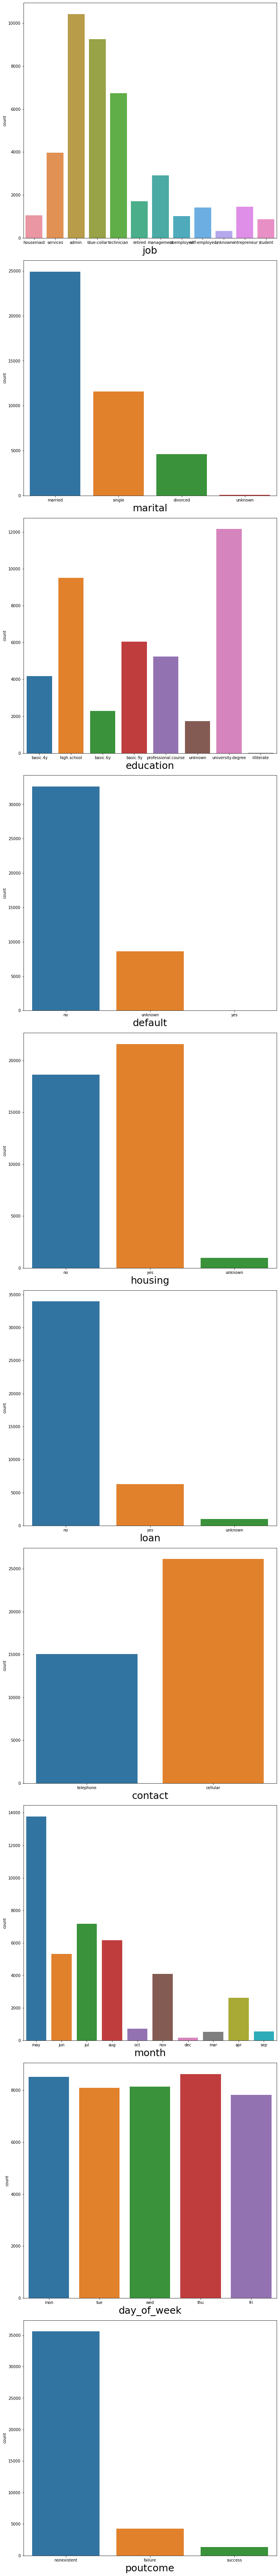

In [19]:
# Anlaysing the all categorical datas using countplot
import warnings
warnings.filterwarnings('ignore')
data2=data[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']]
plt.figure(figsize=(10,100),facecolor="white")
plotnumber=1
for column in data2:
    
    if plotnumber<=11:
        
        ax=plt.subplot(11,1,plotnumber)
        sns.countplot(data2[column])
        plt.xlabel(column,fontsize=25)
        
        
    plotnumber+=1
plt.tight_layout()
plt.show()

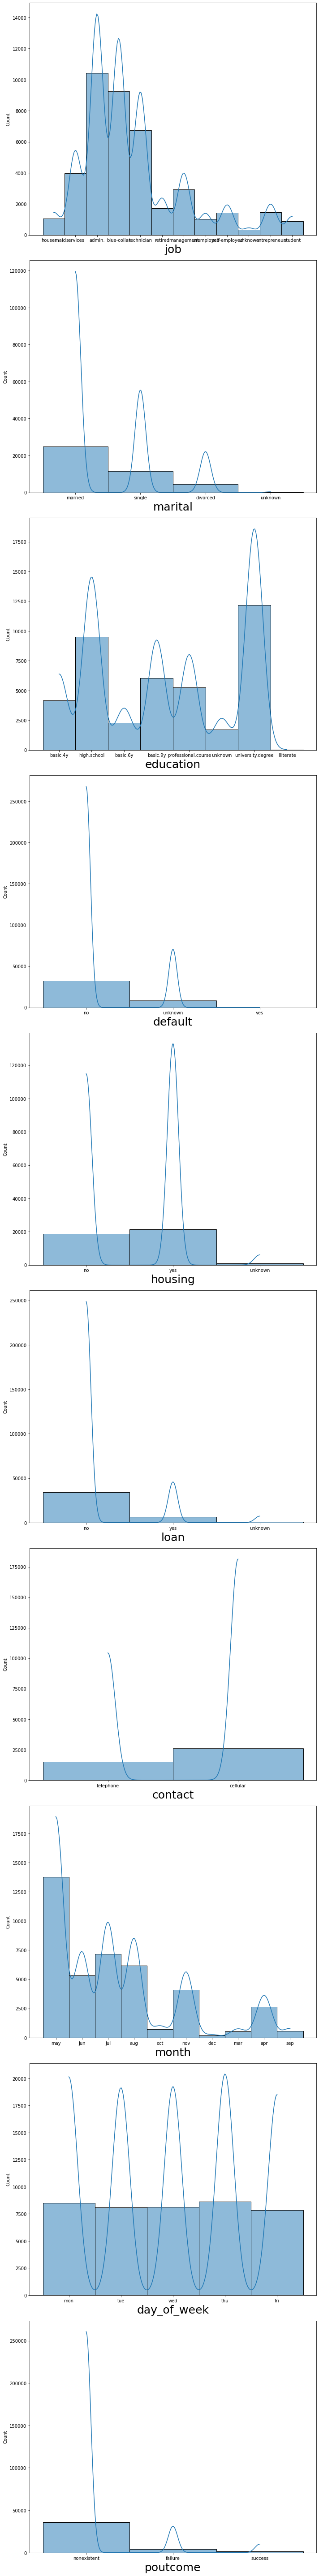

In [20]:
# Analysing the distribution of numerical datas using histplot
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,80),facecolor="white")
plotnumber=1
for column in data1:
    
    if plotnumber<=10:
        
        ax=plt.subplot(10,1,plotnumber)
        sns.histplot(data[column],kde=True)
        plt.xlabel(column,fontsize=25)
        
        
    plotnumber+=1
plt.tight_layout()
plt.show()

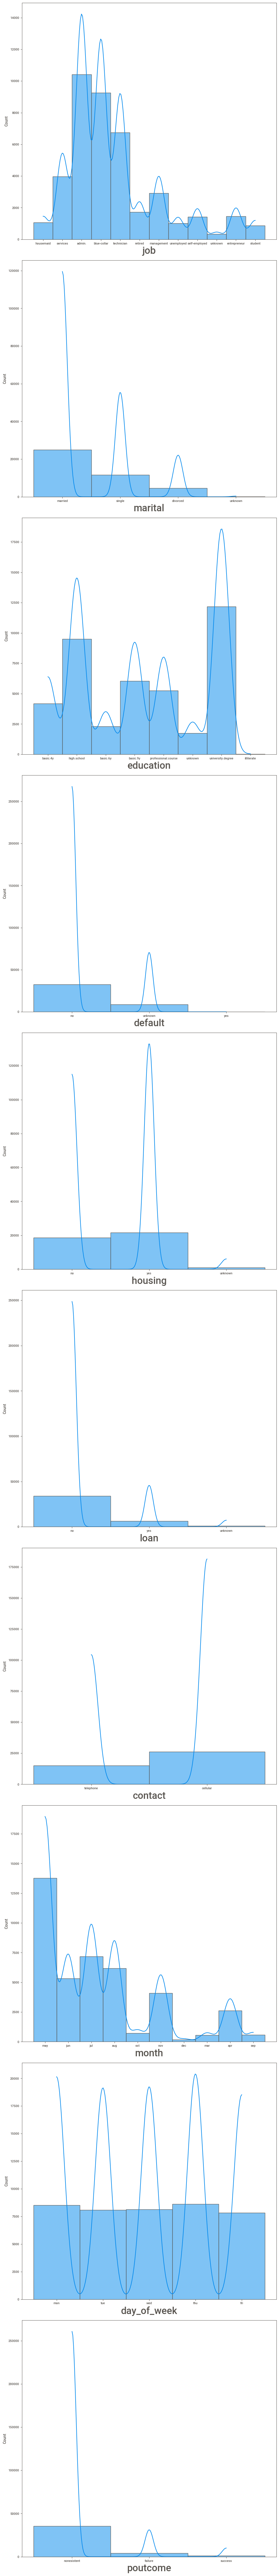

In [79]:
# Analysing the categorical datas using histplot
import warnings
warnings.filterwarnings("ignore")
data2=data[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']]
plt.figure(figsize=(10,100),facecolor="white")
plotnumber=1
for column in data2:
    if plotnumber<=11:
        ax=plt.subplot(11,1,plotnumber)
        sns.histplot(data2[column],kde=True)
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()
plt.show()
        

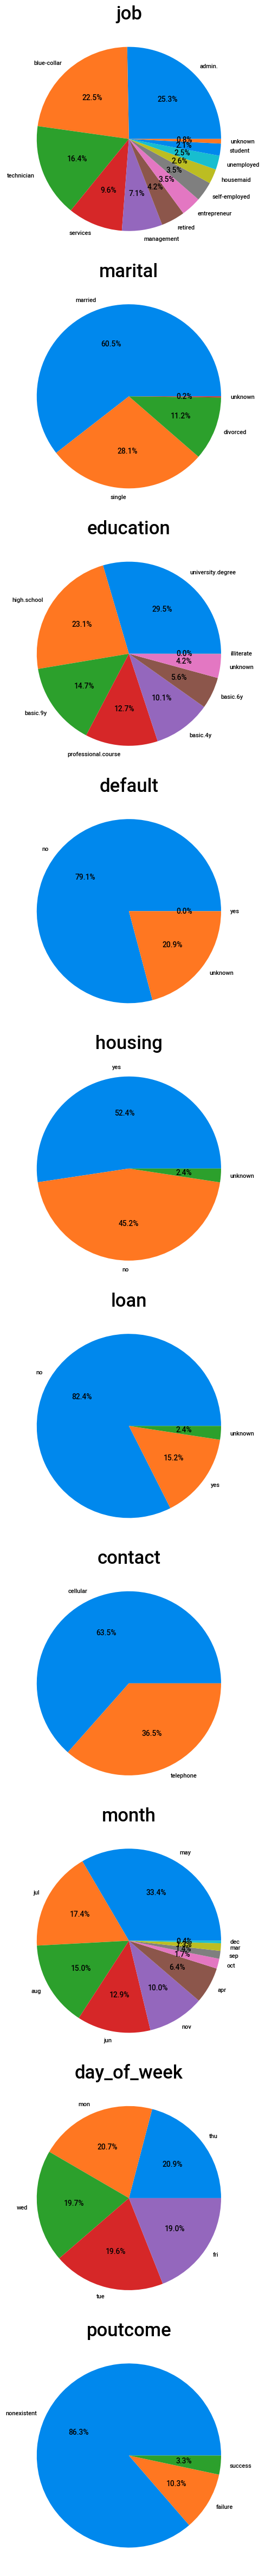

In [80]:
# Analysing the data using pieplot
data2=data[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']]
plt.figure(figsize=(100,100))
plotnumber=1
for column in data2:
    if plotnumber<=21:
        ax = plt.subplot(21,1,plotnumber)
        ax.pie(data2[column].value_counts(normalize=True),labels=data[column].value_counts().index,autopct='%1.1f%%')
        ax.set_title(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()
plt.show()
         

In [81]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [82]:
data1=data[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
data1

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


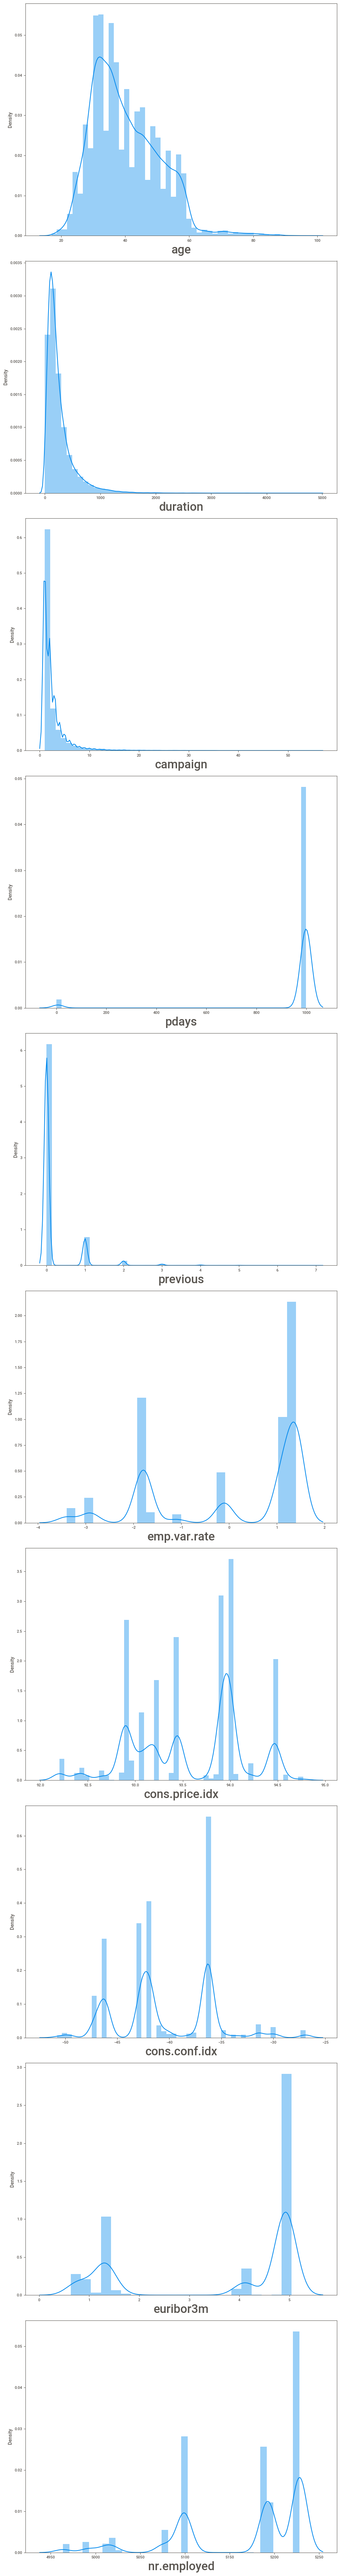

In [83]:
# Analysing the data using distplot
data1=data[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
plt.figure(figsize=(10,75))
plotnumber=1
for column in data1:
    if plotnumber<=10:
        ax=plt.subplot(10,1,plotnumber)
        sns.distplot(data1[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [ ]:
data.loc()

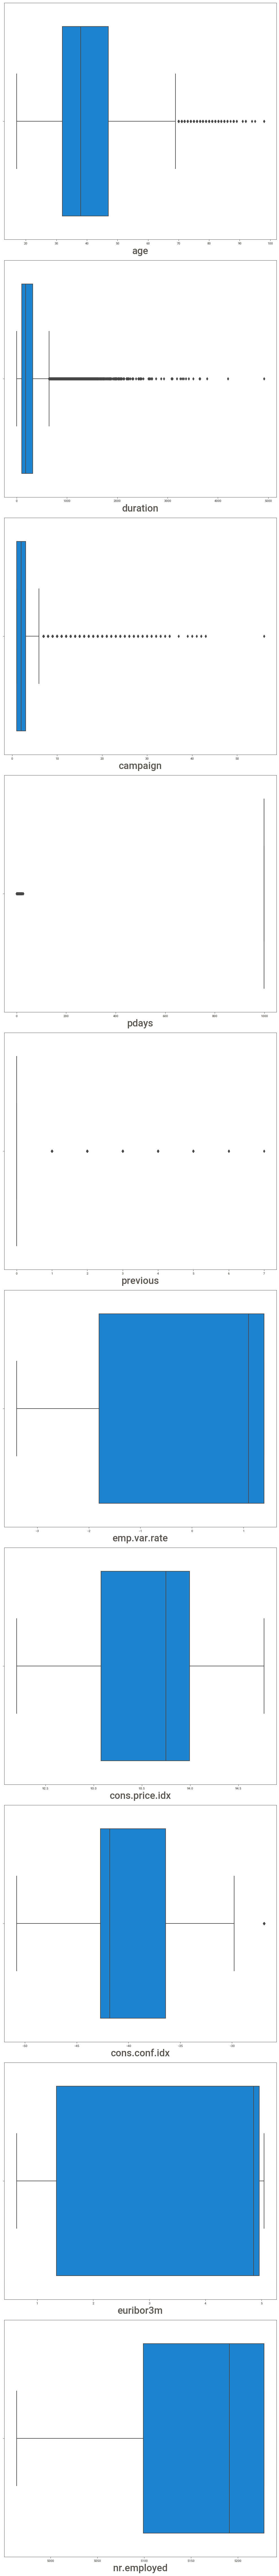

In [84]:
# checking outliers using boxplots
import warnings
warnings.filterwarnings("ignore")
data1=data[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
plt.figure(figsize=(10,100),facecolor="white")
plotnumber=1
for column in data1:
    if plotnumber<=11:
        ax=plt.subplot(11,1,plotnumber)
        sns.boxplot(data1[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()
plt.show()
        

In [85]:
!pip install sweetviz

In [26]:
import sweetviz as sv
my_report= sv.analyze(data)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Bivariate analysis

In [87]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


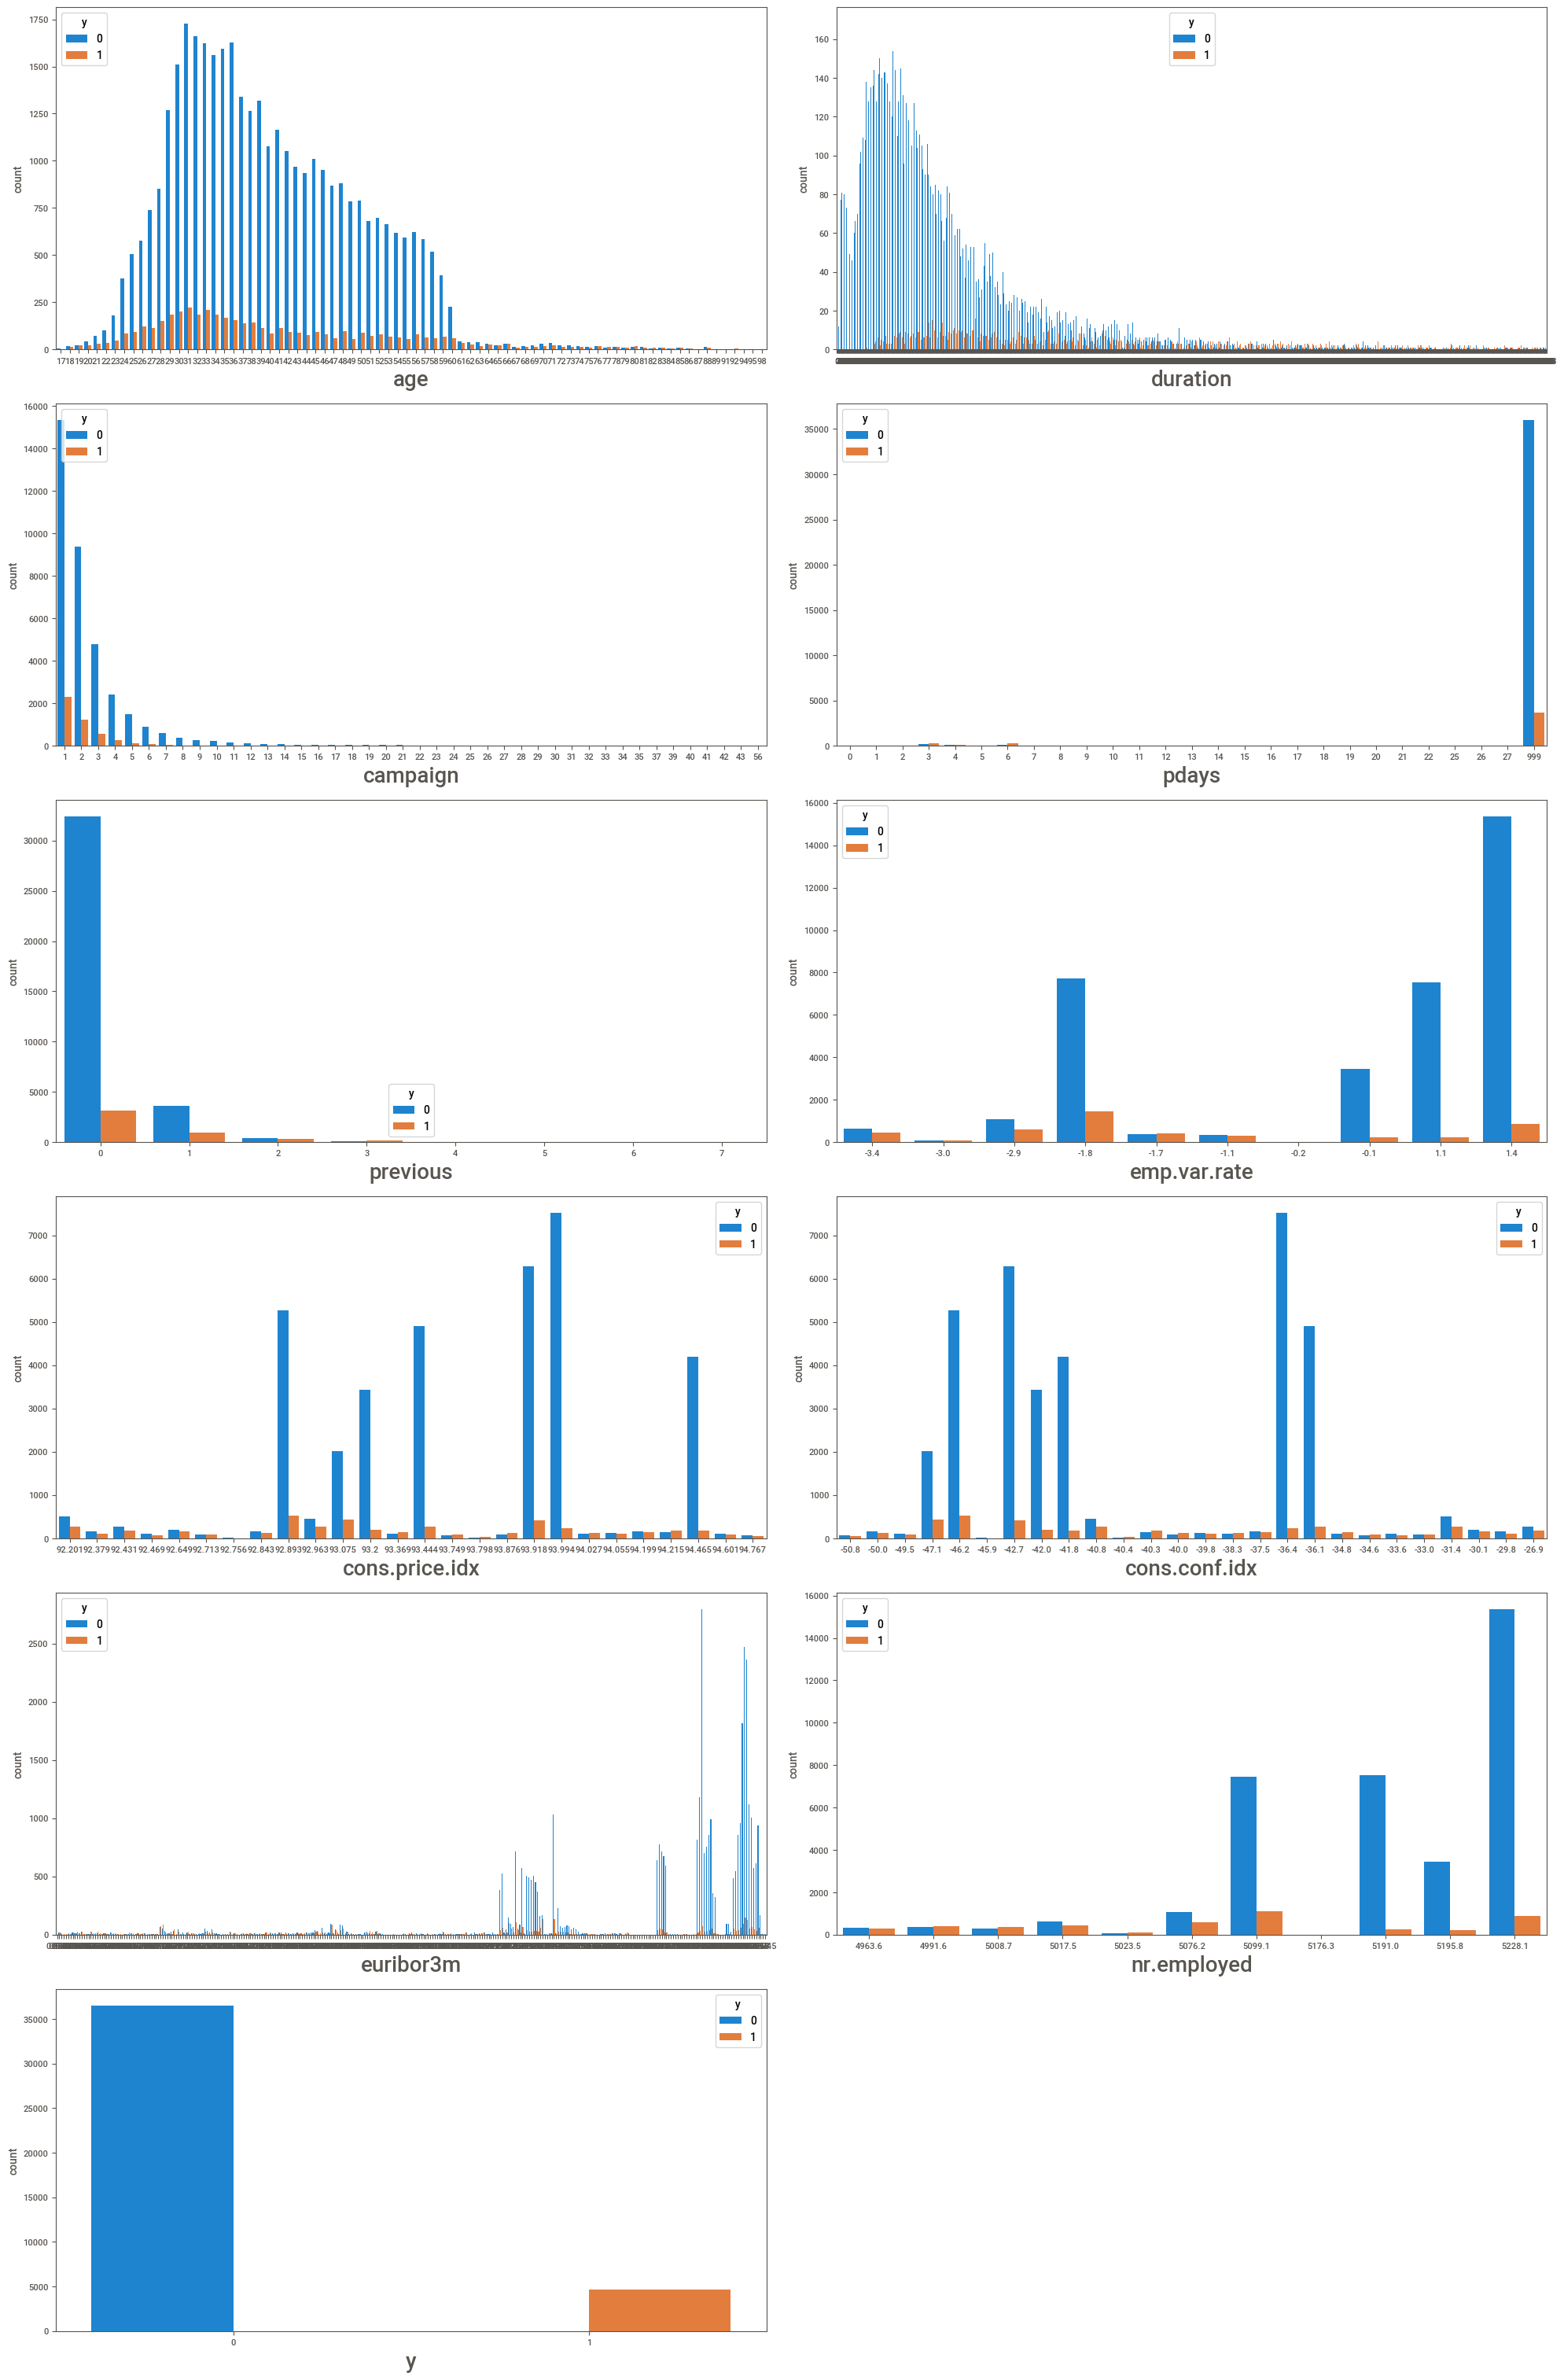

In [100]:
# bivariate analysis using countplot
import warnings
warnings.filterwarnings("ignore")
data=data[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y']]
plt.figure(figsize=(20,50),facecolor="white")
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(10,2,plotnumber)
        sns.countplot(data[column],hue=data['y'])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()
plt.show()

## INSIGHTS IN THE EDA 

### Types of data

@ Variable Types:
    

Numerical (10):- ['age', 'duration', 'campaign', 'pdays', 'previous','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


Categorical (11) :-['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


The information is written on the basis of above graphs and statistical summary.

- age:

We have clients with all the ages (minimum age 17 to maximum age 98).
Mean(40.0241) and median(38) have very less diference.
age attribute does not have any missing values.

- job:

Job attribute shows the clients job information.
It also shows that there are some unknown values. It mean that they are not mentioned there job type.

- marital:

mariatal attribute is shows the client marital information(married,single,divorced).
Pie and Count plots shows that married people are taking more subscriptions than the other clients.

- Education:

Education attribue shows the clients Education information
Pie and Count plots shows that secondary education type people are taking more subscription than the other clients.

- default:

default attribute shows the client credit information-['yes','no'].
Pie and count plots shows that no credit clients are taking more subscription than the other clients.

- housing:

housing attribute shows the client housing loan information.['yes','No']
Pie and Count plots shows that housing loan ('yes') are taken more when compair to othere clients('no').

- loan:

housing attribute shows the client personal loan information.['yes','No'].
Pie and Count plots shows that personal loan ('no') are taken more when compair to other clients('yes').
It quite opposite to the housing loan.

- contact:

contact attribute show the communication type-['cellular', 'telephone'].
Pie and count plot shows that clients are more contacted through the celluar type of communication when to other type.

- month:

Month attribute is about the 12 months information.
pie and count plot shows that the May has the highest count when compair to other months.

- day_of_week:

day_of_week attribute is about the 5 days information.
The mean is 3 and median is 3.
It is normally distributed. The box plot, histogram and distribution plot also showing same. It doesnot have outilers and missing values.

- duration

Duration is in seconds.
The mean is 258.285 and median is 180. there is more difference between mean and the median.

- campaign:

They conducted 56 campaigns.
The campaign is distributed as right skewed.
mean is 2.5676 and median is 2.
There is no missing values in campaigns.

- pdays:

it is about the number of days that passed by after the client was last contacted from a previous campaign.
If pdays=999 means client was not previously contacted.
mean is 962.4755 and median is 999.

- previous:

It is about the number of contacts performed before this campaign and for this client.

- poutcome:

poutcome attribute is about the previous outcome information['nonexistent', 'failure', 'success'].
pie and count plots shows that highest count is nonexistent and lowest count is Success.
mean is 10.4537 and median is 11.

- emp.var.rate:

mean is 0.08189 and median is 1.1.

- cons.price.idx:

It is about the consumer price index in monthly period.
The mean is 93.5757 and median is 93.749. there is only small difference between mean and the median.

- cons.conf.idx:

It is about the consumer confidence index in monthly period.

- euribor3m:

mean is 3.6213 and median is 4.857.

- nr.employed:

It is indicated as the number of employees.
The mean is 5167.0359 and median is 5191.

- y:

y is the target variable. It is about the clients subscribe the term desposite (yes or no).
pie and count plots shows that highest count is no and lowest count is yes.

### Multivariate analysis

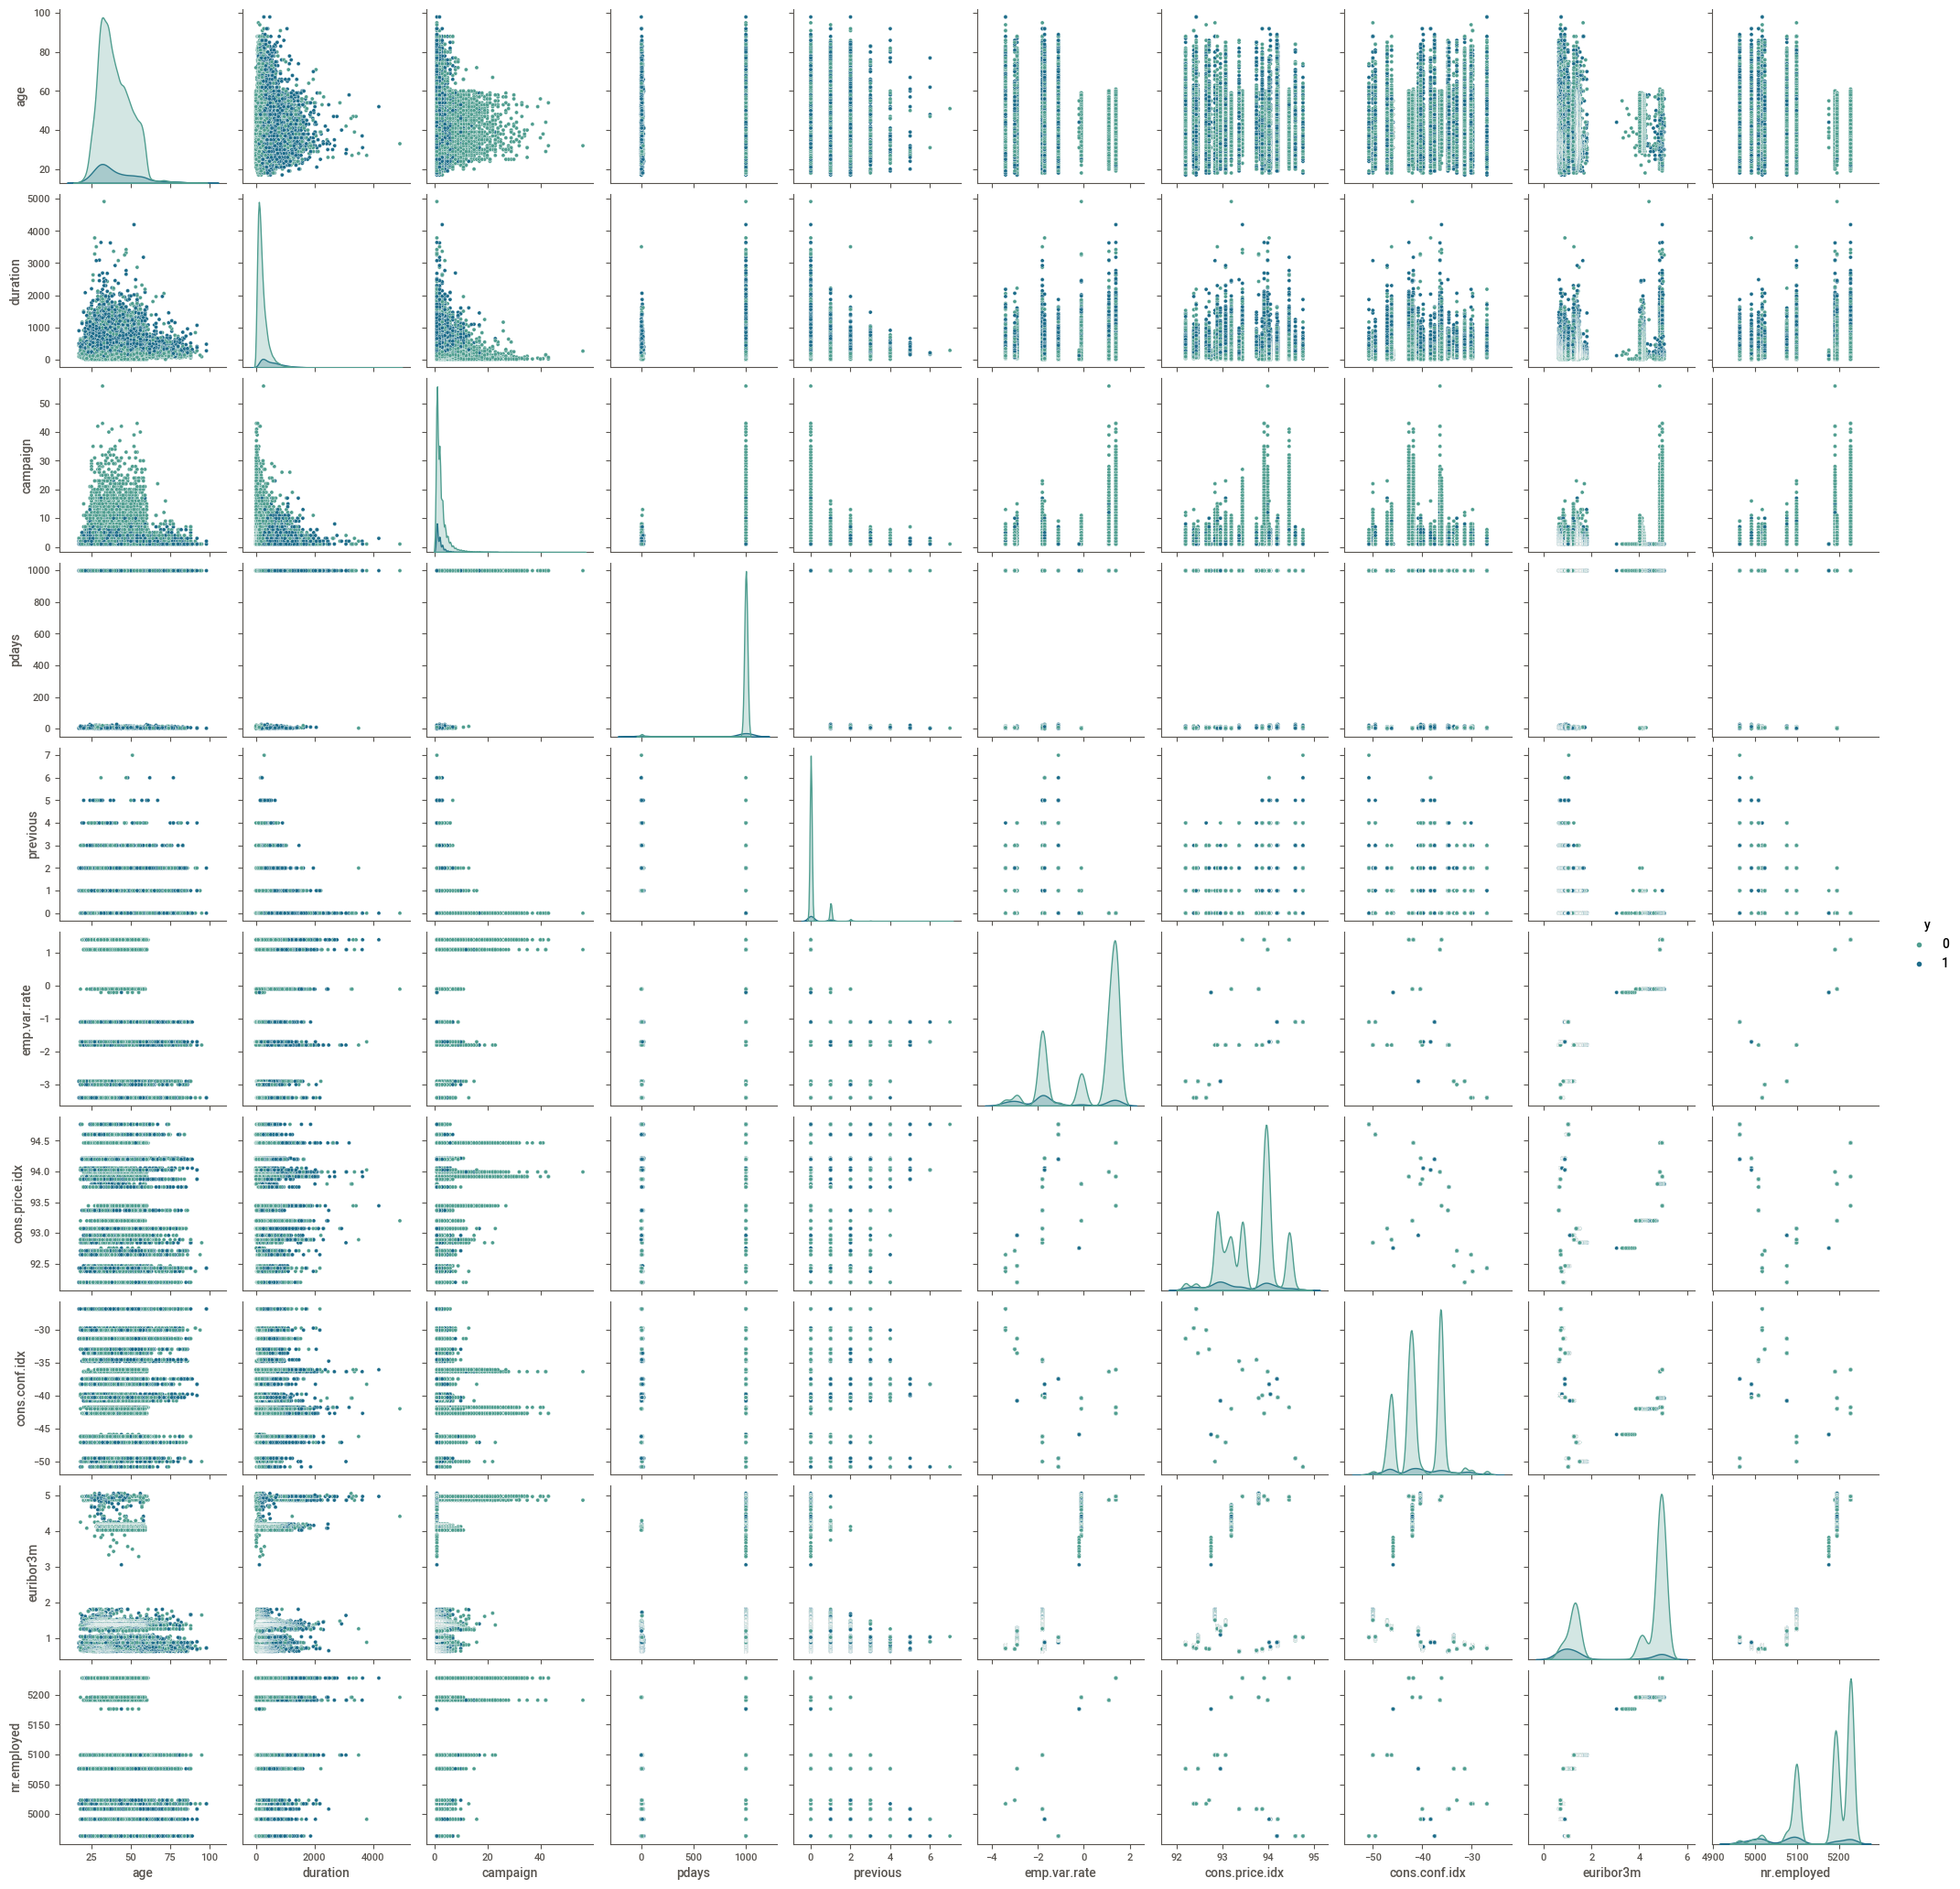

In [97]:
sns.pairplot(data,size=2.1,hue='y',palette='crest')

## DATA PREPROCESSING AND FEATURE ENGINEERING

### checking correlation

In [ ]:
# checking correlation
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),cmap='viridis',annot=True,linewidths=0.03,center=0)


In [106]:
data.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


### checking null values

In [107]:
# checking null value
data.isnull().sum()

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### data has no null value.

### checking outliers

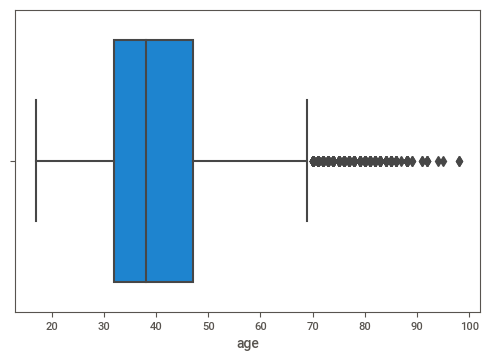

In [108]:
# checking the outliers by boxplot
sns.boxplot(data['age'])
plt.show()

In [109]:
# Age
Q1=data['age'].quantile(q=.25)
Q3=data['age'].quantile(q=.75)
print('Q1 is:',Q1)
print('Q3 is:',Q3)

Q1 is: 32.0
Q3 is: 47.0


In [110]:
# IQR = Q3-Q1
# LOWER 1.5*IQR IS Q1-1.5*IQR
# UPPER 1.5*IQR IS Q3+1.5*IQR
l_outlier=Q1-1.5*(Q3-Q1)
U_outlier=Q3+1.5*(Q3-Q1)
print('l_outliers:',l_outlier)
print('U_outliers:',U_outlier)

l_outliers: 9.5
U_outliers: 69.5


In [111]:
print('Number of outliers in age upper:',data[data['age']> 69.5]['age'].count())
print('Number of outliers in age lower:',data[data['age']< 9.5]['age'].count())                                              
                                              

Number of outliers in age upper: 469
Number of outliers in age lower: 0


In [112]:
data.loc[data['age']>69.5]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27713,70,187,3,999,0,-1.8,92.843,-50.0,1.811,5099.1,1
27757,76,167,9,999,0,-1.8,92.843,-50.0,1.757,5099.1,0
27780,73,179,1,999,1,-1.8,92.843,-50.0,1.687,5099.1,0
27800,88,48,1,999,0,-1.8,92.843,-50.0,1.663,5099.1,0
27802,88,266,2,999,0,-1.8,92.843,-50.0,1.663,5099.1,1
...,...,...,...,...,...,...,...,...,...,...,...
40986,84,138,4,3,1,-1.1,94.601,-49.5,1.000,4963.6,0
40996,81,621,1,999,2,-1.1,94.601,-49.5,1.016,4963.6,1
41004,80,411,1,999,1,-1.1,94.601,-49.5,1.025,4963.6,1
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1


In [113]:
median= data.loc[data['age']<69.5,'age'].median()
median

38.0

In [114]:
data.loc[data.age>69.5,'age']=np.nan
data['age'].fillna(data['age'].median(),inplace=True)

<AxesSubplot:xlabel='age'>

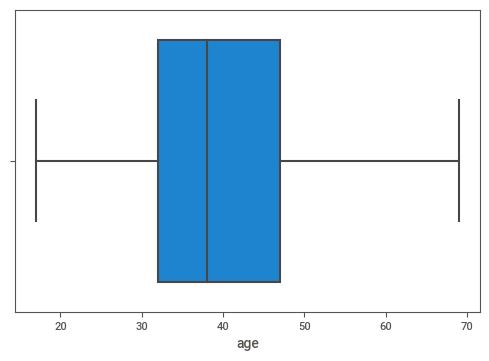

In [115]:
 sns.boxplot(data['age'])

In [116]:
# DURATION
Q1=data['duration'].quantile(q=.25)
Q3=data['duration'].quantile(q=.75)
print('Q1 IS :',Q1)
print('Q3 IS :',Q3)

Q1 IS : 102.0
Q3 IS : 319.0


In [117]:
L_outliers=(Q1)-1.5*(Q3-Q1)
U_outliers=(Q3)+1.5*(Q3-Q1)
print('L_outliers :',L_outliers)
print('U_outliers :',U_outliers)

L_outliers : -223.5
U_outliers : 644.5


In [118]:
print('Number of oultliers in Duration upper : ',data[data['duration']>644.5]['duration'].count())
print('Number of outliers in Duration lower : ', data[data['duration']<(-223.5)]['duration'].count())

Number of oultliers in Duration upper :  2963
Number of outliers in Duration lower :  0


In [119]:
data.loc[data['duration']>644.5]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
37,52.0,1666,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
57,45.0,787,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
61,51.0,812,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
75,41.0,1575,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1
83,49.0,1042,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1
...,...,...,...,...,...,...,...,...,...,...,...
41147,25.0,712,2,19,1,-1.1,94.767,-50.8,1.040,4963.6,1
41153,67.0,655,2,5,5,-1.1,94.767,-50.8,1.039,4963.6,1
41160,33.0,843,1,999,0,-1.1,94.767,-50.8,1.035,4963.6,1
41164,54.0,1868,2,10,1,-1.1,94.767,-50.8,1.035,4963.6,1


In [120]:
median=data.loc[data['duration']<644.5,'duration'].median()
median

167.0

In [121]:
data.loc[data.duration>644.5,'duration']=np.nan
data['duration'].fillna(data['duration'].median(),inplace=True)

<AxesSubplot:xlabel='duration'>

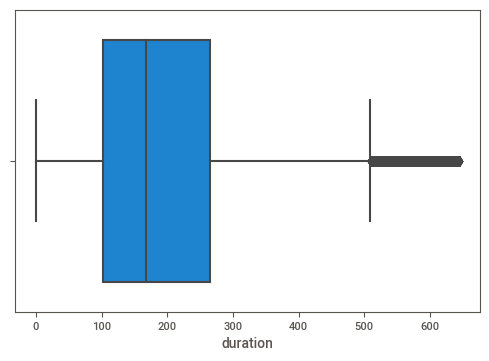

In [122]:
sns.boxplot(data['duration'])

In [123]:
# CAMPAIGN
Q1= data['campaign'].quantile(q=.25)
Q3= data['campaign'].quantile(q=.75)
print('Q1 IS:',Q1)
print('Q3 IS:',Q3)

Q1 IS: 1.0
Q3 IS: 3.0


In [124]:
L_outliers=(Q1)-1.5*(Q3-Q1)
U_outliers=(Q3)+1.5*(Q3-Q1)
print('L_outliers :',L_outliers)
print('U_outliers :',U_outliers)

L_outliers : -2.0
U_outliers : 6.0


In [125]:
print('Number of oultliers in campaign upper : ',data[data['campaign']>6.0]['duration'].count())
print('Number of outliers in campaign lower : ', data[data['campaign']<(-2.0)]['duration'].count())

Number of oultliers in campaign upper :  2406
Number of outliers in campaign lower :  0


In [126]:
data.loc[data['campaign']>6]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
887,54.0,388.0,7,999,0,1.1,93.994,-36.4,4.856,5191.0,0
1043,41.0,79.0,8,999,0,1.1,93.994,-36.4,4.856,5191.0,0
1094,40.0,253.0,8,999,0,1.1,93.994,-36.4,4.856,5191.0,0
1097,51.0,244.0,7,999,0,1.1,93.994,-36.4,4.856,5191.0,0
1230,48.0,521.0,7,999,0,1.1,93.994,-36.4,4.855,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...
40611,38.0,543.0,9,999,1,-1.1,94.199,-37.5,0.883,4963.6,0
40631,38.0,213.0,7,999,0,-1.1,94.199,-37.5,0.882,4963.6,0
40698,29.0,157.0,7,3,5,-1.1,94.199,-37.5,0.879,4963.6,0
40821,33.0,246.0,9,999,2,-1.1,94.199,-37.5,0.879,4963.6,0


In [127]:
median=data.loc[data['campaign']<6,'campaign'].median()
median

2.0

In [128]:
data.loc[data.campaign>6,'campaign']=np.nan
data['campaign'].fillna(data['campaign'].median(),inplace=True)

<AxesSubplot:xlabel='campaign'>

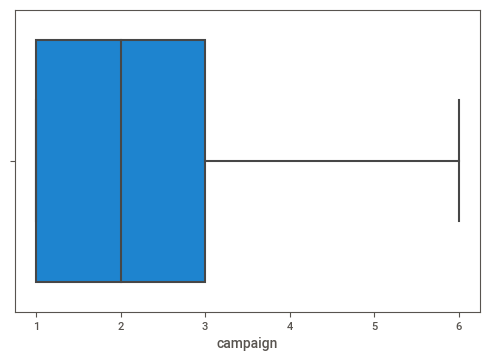

In [129]:
sns.boxplot(data['campaign'])

In [130]:
# Pdays
Q1= data['pdays'].quantile(q=.25)
Q3= data['pdays'].quantile(q=.75)
print('Q1 IS:',Q1)
print('Q3 IS:',Q3)

Q1 IS: 999.0
Q3 IS: 999.0


In [131]:
L_outliers=(Q1)-1.5*(Q3-Q1)
U_outliers=(Q3)+1.5*(Q3-Q1)
print('L_outliers :',L_outliers)
print('U_outliers :',U_outliers)

L_outliers : 999.0
U_outliers : 999.0


In [132]:
print('Number of oultliers in pdays upper : ',data[data['pdays']>999]['pdays'].count())
print('Number of outliers in pdays lower : ', data[data['pdays']<999]['pdays'].count())

Number of oultliers in pdays upper :  0
Number of outliers in pdays lower :  1515


In [133]:
data.loc[data['pdays']<999]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24108,37.0,119.0,1.0,6,1,-0.1,93.200,-42.0,4.286,5195.8,0
24264,48.0,112.0,1.0,4,1,-0.1,93.200,-42.0,4.191,5195.8,0
24279,42.0,94.0,1.0,4,1,-0.1,93.200,-42.0,4.191,5195.8,0
24397,50.0,77.0,1.0,3,1,-0.1,93.200,-42.0,4.191,5195.8,0
24482,36.0,200.0,2.0,4,1,-0.1,93.200,-42.0,4.191,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...
41163,35.0,385.0,3.0,4,2,-1.1,94.767,-50.8,1.035,4963.6,1
41164,54.0,167.0,2.0,10,1,-1.1,94.767,-50.8,1.035,4963.6,1
41174,62.0,208.0,1.0,1,6,-1.1,94.767,-50.8,1.031,4963.6,1
41178,62.0,483.0,2.0,6,3,-1.1,94.767,-50.8,1.031,4963.6,1


In [134]:
median=data.loc[data['pdays']<999,'pdays'].median()
median

6.0

In [135]:
data.loc[data.pdays<999,'pdays']=np.nan
data['pdays'].fillna(data['pdays'].median(),inplace=True)

<AxesSubplot:xlabel='pdays'>

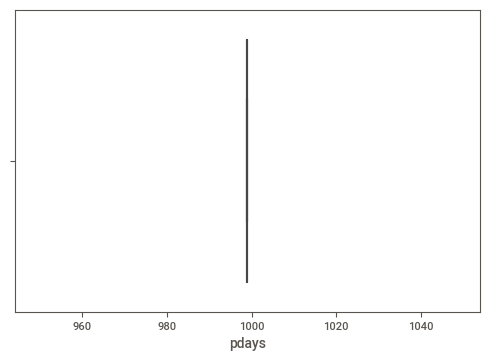

In [136]:
sns.boxplot(data['pdays'])

### CONVERTING CATEGORICAL DATA IN TO NUMERICAL DATA

In [86]:
df=data.copy()

In [87]:
# converting to numerical data
df['marital'].replace(['married', 'single', 'divorced','unknown'],[3,2,1,0],inplace=True)
df['education'].replace(['basic.4y','basic.6y','basic.9y','professional.course', 'unknown', 'high.school','university.degree','illiterate'],[3,2,0,1,4,5,6,7],inplace=True)
df['contact'].replace([ 'cellular', 'telephone'],[1,2],inplace=True)
df['month'].replace(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'sep'],[5,6,7,8,10,11,12,1,2,3,4,9],inplace=True)
df['poutcome'].replace([ 'success','nonexistent' ,'failure'],[0,2,1],inplace=True)
df['day_of_week'].replace(['mon','tue','wed','thu','fri'],[0,1,2,3,4],inplace=True)
df['job'].replace(['housemaid','services','admin.', 'blue-collar', 'technician' ,'retired','management', 'unemployed', 'self-employed', 'unknown' ,'entrepreneur','student'],[0,1,2,3,4,5,6,7,8,9,10,11],inplace=True)
df['default'].replace(['unknown','no','yes'],[1,0,2],inplace=True)
df['housing'].replace(['yes','no','unknown'],[1,0,2],inplace=True)
df['loan'].replace(['yes','no','unknown'],[1,0,2],inplace=True)
df['y'].replace(['no','yes'],[0,1],inplace=True)

In [88]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0,3,3,0,0,0,2,5,0,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,3,5,1,0,0,2,5,0,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,3,5,0,1,0,2,5,0,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2,3,2,0,0,0,2,5,0,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,3,5,0,0,1,2,5,0,...,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,3,1,0,1,0,1,11,4,...,1,999,0,2,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,3,3,1,0,0,0,1,11,4,...,1,999,0,2,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,3,6,0,1,0,1,11,4,...,2,999,0,2,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,4,3,1,0,0,0,1,11,4,...,1,999,0,2,-1.1,94.767,-50.8,1.028,4963.6,1


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# MODEL BUILDING

In [90]:
X=df.drop(columns=['y'])
Y=df['y']

##### scaling the data using MinMaxScaler

In [91]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size=.25, random_state=42, )

In [93]:
X_train1= Scaler.fit_transform(X_train)
X_test1=Scaler.transform(X_test)

In [94]:
X_train1.shape,X_test1.shape

((30891, 20), (10297, 20))

## LOGISTIC REGRESSION

In [156]:
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression()
log_reg.fit(X_train1,Y_train)
Y_pred=log_reg.predict(X_test1)
Y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [157]:
from sklearn.metrics import accuracy_score,auc,confusion_matrix,precision_score,recall_score
accuracy = accuracy_score(Y_test,Y_pred)
accuracy

0.9095853161114887

In [158]:
Y_train_predict=log_reg.predict(X_train1)
acc_train=accuracy_score(Y_train,Y_train_predict)
acc_train

0.9102974976530381

In [159]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))


              precision    recall  f1-score   support

           0       0.93      0.98      0.95      9144
           1       0.67      0.38      0.48      1153

    accuracy                           0.91     10297
   macro avg       0.80      0.68      0.72     10297
weighted avg       0.90      0.91      0.90     10297



### Logistic regression algorithm got 91% of perfomance.

# KNN

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
sm=SMOTE()

In [60]:
x_sm,y_sm=sm.fit_resample(X_train1,Y_train)

In [61]:
from collections import Counter
counter=Counter()

In [62]:
print('Actual classes :',Counter(Y_train))
print("smoted classes:",Counter(y_sm))

Actual classes : Counter({0: 27404, 1: 3487})
smoted classes: Counter({0: 27404, 1: 27404})


In [63]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,11):             
    knn = KNeighborsClassifier(n_neighbors=i)                               
    knn.fit(x_sm,y_sm)                      
    pred_knn = knn.predict(X_test1)
    error_rate.append(np.mean(pred_knn != Y_test))         

Text(0, 0.5, 'Error Rate')

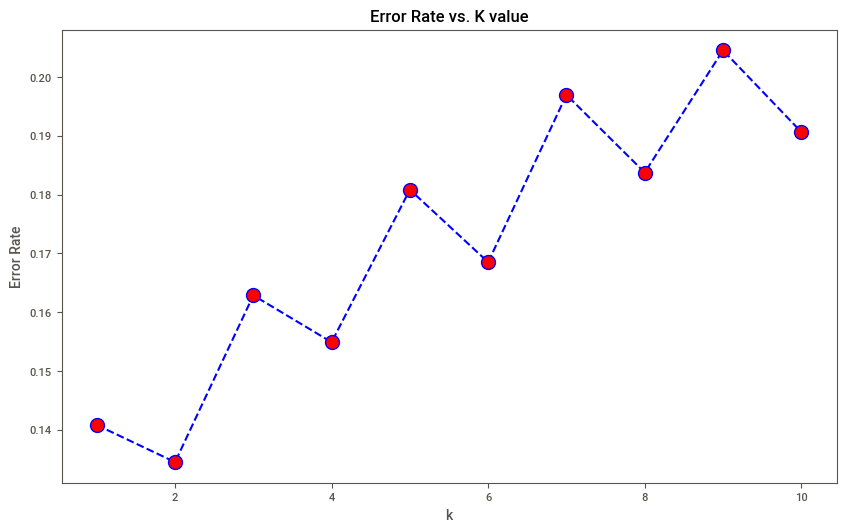

In [64]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K value')
plt.xlabel('k')
plt.ylabel('Error Rate')

In [65]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_sm,y_sm)
Y_pred=knn.predict(X_test1)

In [66]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score

In [67]:
print("accuracy_score is : ",accuracy_score(Y_test,Y_pred))

accuracy_score is :  0.8191706322229776


In [68]:
print(confusion_matrix(Y_test,Y_pred))

[[7733 1411]
 [ 451  702]]


In [69]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      9144
           1       0.33      0.61      0.43      1153

    accuracy                           0.82     10297
   macro avg       0.64      0.73      0.66     10297
weighted avg       0.88      0.82      0.84     10297



In [70]:
print(precision_score(Y_test,Y_pred))

0.3322290582110743


### KNN classification accuracy got 82%.

# SVM

In [221]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,Y_train)

SVC()

In [222]:
Y_pred_sv=svm.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score,recall_score,classification_report,f1_score

In [224]:
print(accuracy_score(Y_test,Y_pred_sv))

0.8968631640283578


In [226]:
print(classification_report(Y_test,Y_pred_sv))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9144
           1       0.61      0.21      0.32      1153

    accuracy                           0.90     10297
   macro avg       0.76      0.60      0.63     10297
weighted avg       0.88      0.90      0.87     10297



In [228]:
cm=pd.crosstab(Y_test,Y_pred_sv)

In [229]:
cm

col_0,0,1
y,,
0,8988,156
1,906,247


### from data applying SVM algorithm we have get 90% perfomance.

#  RANDOM  FOREST

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [16]:
Y_pred_rf= rf.predict(X_test)

In [18]:
Y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
(Y_test==Y_pred_rf).sum()/len(Y_test)*100

91.38584053607846

In [24]:
print(accuracy_score(Y_test,Y_pred_rf))

0.9138584053607847


In [25]:
print(classification_report(Y_test,Y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      9144
           1       0.64      0.52      0.58      1153

    accuracy                           0.91     10297
   macro avg       0.79      0.74      0.76     10297
weighted avg       0.91      0.91      0.91     10297



In [34]:
pd.crosstab(Y_test,Y_pred_rf)

col_0,0,1
y,,
0,8805,339
1,548,605


### RANDOM FOREST algorithm got 91% accuracy. 

# XG BOOSTER

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
XGB=GradientBoostingClassifier()
XGB.fit(X_train,Y_train)

In [38]:
Y_pred_GB=XGB.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score,classification_report,recall_score,f1_score

In [40]:
print(accuracy_score(Y_test,Y_pred_GB))

0.9214334272118093


In [42]:
print(classification_report(Y_test,Y_pred_GB))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      9144
           1       0.69      0.54      0.61      1153

    accuracy                           0.92     10297
   macro avg       0.82      0.75      0.78     10297
weighted avg       0.92      0.92      0.92     10297



In [44]:
pd.crosstab(Y_test,Y_pred_GB)

col_0,0,1
y,,
0,8865,279
1,530,623


### XG BOOSTER Algorithm got 92% perfomance.

# DECISION TREE

In [47]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train,Y_train)

DecisionTreeClassifier()

In [48]:
Y_pred_DT=DT.predict(X_test)

In [49]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,recall_score

In [50]:
print(accuracy_score(Y_test,Y_pred_DT))

0.8923958434495484


In [52]:
print(classification_report(Y_test,Y_pred_DT))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9144
           1       0.52      0.54      0.53      1153

    accuracy                           0.89     10297
   macro avg       0.73      0.74      0.73     10297
weighted avg       0.89      0.89      0.89     10297



In [53]:
pd.crosstab(Y_test,Y_pred_DT)

col_0,0,1
y,,
0,8567,577
1,531,622


   ## DECISION TREE algorithm got perfomance rate is 89%.

# CONCLUSION

## 1) Portughese bank data sets we predict the model using different type of machine learning algorithms LOGISTIC REGRESSION, KNN, SVM, RANDOM FOREST, XG BOOSTER, DECISION TREE.

## 2) We have get a different accuracy score in machine learning algorithms. here we got maximum accuracy score in XG BOOSTER Perfomance rate is 92% compared to other model evaluation.